In [1]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [12]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')
head(barris)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_double()
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 6 x 8
    Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri Sexe  Nacionalitat
  <dbl>          <dbl> <chr>              <dbl> <chr>     <chr> <chr>       
1  2018              1 Ciutat Vella           1 el Raval  Home  Espanya     
2  2018              1 Ciutat Vella           2 el Barri… Home  Espanya     
3  2018              1 Ciutat Vella           3 la Barce… Home  Espanya     
4  2018              1 Ciutat Vella           4 Sant Per… Home  Espanya     
5  2018              2 Eixample               5 el Fort … Home  Espanya     
6  2018              2 Eixample               6 la Sagra… Home  Espanya     
# … with 1 more variable: Nombre <dbl>


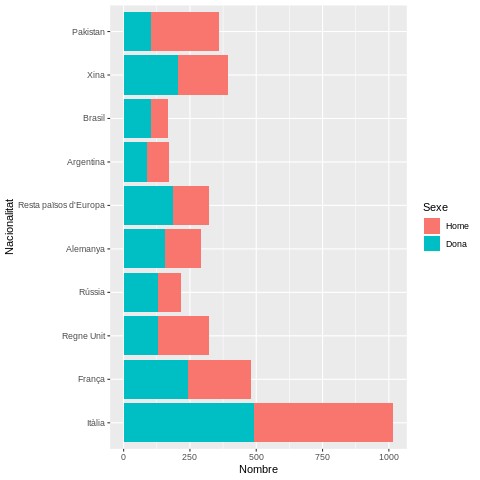

In [174]:
%%R

# Let's manually convert a few columns into factors. 
barris1 <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!
library(ggplot2)
barris2 <- barris1 %>% filter (Nom_Barri == 'el Poblenou') %>%
            filter (Nacionalitat != 'Espanya')
nacionalitat_dat <- barris2 %>% group_by(Nacionalitat) %>% summarize(pop = sum(Nombre)) %>% arrange(desc(pop))
barris3 <- barris2 %>% filter(Nacionalitat %in% as_vector(nacionalitat_dat[1:10,1]))
ggplot(barris3, aes(x = Nacionalitat, y = Nombre, fill = Sexe))+
    geom_col() +
    coord_flip()

# Problem 3: Classes in Python

In [157]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!
import numpy as np
class RandomClassifier ():
    def __init__(self, probability):
        self.probability = probability
        
    def predict(self, x):
        out = np.random.binomial(1, self.probability, 1)
        return out

In [158]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

A pure function is one that will give the same output when given the same input and one that produces no side effects. This ensures that the function will work independently from the processes or variables in the environment, which ensures that it is reproduceable and reliable. 

### What is lazy evaluation and when might you use it? (2-3 lines)

It is an evaluation that only runs when the output value is needed. This improves efficiency, reduces the running time needed and reduces the storage needed as extra evaluations are avoided. 